# Aufwärmübung

**Inhalt:** Shapely-Shapes

**Nötige Skills**
- Basic pandas skills

**Lernziele**
- Punkte, Linien, Polygone

## Setup

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline

## Shapely

Eine Library zur mathematischen Analyse von Formen und für die Geometrie: https://shapely.readthedocs.io/en/stable/

### Point

In [10]:
#in einem zweidimensionalen Koordinatensystem braucht es zwei verschiedenen Punkte mit einem(versch.) Wert.
x1 = 5
y1 = 5


In [11]:
punkt1 = Point(x1, y1)

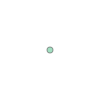

In [12]:
punkt1

### Line

In [13]:
x2a = 20
y2a = 0

x2b = 0
y2b = 20

In [14]:
linie1 = LineString([Point(x2a, y2a), Point(x2b, y2b)])

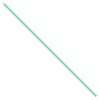

In [15]:
linie1

### Polygon

In [31]:
x3a = 0
y3a = 0

x3b = 10
y3b = 0

x3c = 10
y3c = 10

x3d = 0
y3d = 10

In [32]:
polygon1 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3a, y3d]])

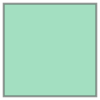

In [34]:
polygon1

### Let's plot it

In [35]:
df = pd.DataFrame({'geometry': [punkt1, linie1]})

In [36]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [37]:
gdf

,geometry
0,POINT (5.00000 5.00000)
1,"LINESTRING (20.00000 0.00000, 0.00000 20.00000)"


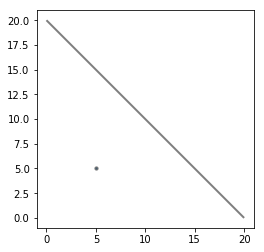

In [22]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

## Your Turn

Wir spielen Picasso und zeichnen ein Haus.

**Aufgabe:** Definieren Sie ein paar Rechtecke, Linien und Punkte...

In [167]:
polygon1 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3a, y3d]])
polygon2 = Polygon([[6, 0], [6, 3], [8, 3], [8, 0]])
polygon3 = Polygon([[5, 8], [5, 7], [8, 9], [8, 8]])

In [168]:
linie2 = LineString([Point(0, 10), Point(7, 15), Point(10, 10)])

In [169]:
punkt2 = Point(6.5, 1)

In [170]:
df = pd.DataFrame({'geometry': [polygon1, polygon2, polygon3, linie2, punkt2]})

In [171]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

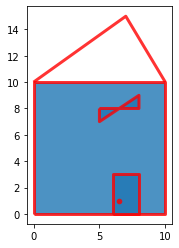

In [172]:
gdf.plot(alpha=0.8, linewidth=3, edgecolor='red', markersize=7)

... fügen Sie die Objekte in ein Geodataframe und plotten Sie dieses!

## Eigenschaften

- Geometrie-Typ

In [173]:
polygon1.geom_type

'Polygon'

- Fläche

In [174]:
polygon1.area

100.0

- Mittelpunkt

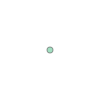

In [175]:
polygon1.centroid

- Rohdaten

In [176]:
polygon1.wkt

'POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))'

## Shapes modifizieren

### Buffer

Praktisch: Erstellt eine "Pufferzone" mit dem Radius x rund um ein Shape

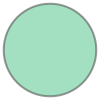

In [177]:
punkt1.buffer(3)

Können wir auch plotten:

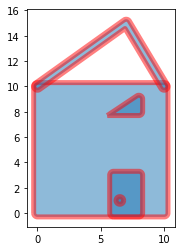

In [183]:
gdf.buffer(0.3).plot(alpha=0.5, linewidth=5, edgecolor='red', markersize=5)

### Union

Auch praktisch: Vereinigt zwei (oder mehr) Shapes zu einer einzigen Shape.

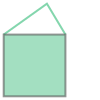

In [184]:
polygon1.union(linie2)

Um alle shapes in einem Geodataframe zusammenzufügen: `.unary_union`

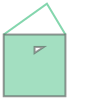

In [185]:
gdf.unary_union

Auch hier können wir wieder eine Pufferzone darumlegen...

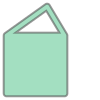

In [186]:
gdf.unary_union.buffer(0.5)

### Difference

Die "Differenz" zwischen zwei Shapes

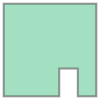

In [187]:
polygon1.difference(polygon2)

### Envelope

Ähnlich wie Buffer - ein Rechteck, das ein Objekt umhüllt

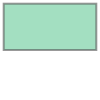

In [188]:
linie2.envelope

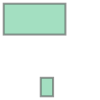

In [189]:
linie2.envelope.union(polygon2)